# Import libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics
from scipy import stats

# Import the data set

In [2]:
urlfile = 'https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/distict_x_houses/District_X_Houses.csv'
data = pd.read_csv(urlfile)

# Exploratory Data Analysis

1) Median House Value: Median house value for households within a block (measured in US Dollars) [$] (Output attribute)

2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

3) Median Age: Median age of a house within a block; a lower number is a newer building [years]

4) Total Rooms: Total number of rooms within a block

5) Total Bedrooms: Total number of bedrooms within a block

6) Population: Total number of people residing within a block

7) Households: Total number of households, a group of people residing within a home unit, for a block

8) Latitude: A measure of how far north a house is; a higher value is farther north [°]

9) Longitude: A measure of how far west a house is; a higher value is farther west [°]

10) Distance to coast: Distance to the nearest coast point [m]

11) Distance to Los Angeles: Distance to the center of Los Angeles [m]

12) Distance to San Diego: Distance to the center of San Diego [m]

13) Distance to San Jose: Distance to the center of San Jose [m]

14) Distance to San Francisco: Distance to the center of San Francisco [m]

In [3]:
print(f'The number of rows are {data.shape[0]}\n Number of columns are {data.shape[1]}')
print(f'Columns names are:\n {data.columns}')

The number of rows are 20640
 Number of columns are 14
Columns names are:
 Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')


In [4]:
# Checking the dataset and variables
pd.DataFrame(data.dtypes, columns = ['Types'])

,Types
Median_House_Value,float64
Median_Income,float64
Median_Age,int64
Tot_Rooms,int64
Tot_Bedrooms,int64
Population,int64
Households,int64
Latitude,float64
Longitude,float64
Distance_to_coast,float64


In [5]:
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

There isn't any null values in this dataset

In [7]:
data.nunique()

Median_House_Value           3842
Median_Income               12928
Median_Age                     52
Tot_Rooms                    5926
Tot_Bedrooms                 1928
Population                   3888
Households                   1815
Latitude                      862
Longitude                     844
Distance_to_coast           12590
Distance_to_LA              12590
Distance_to_SanDiego        12590
Distance_to_SanJose         12590
Distance_to_SanFrancisco    12590
dtype: int64

There aren't any categorical data

In [8]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


<AxesSubplot:>

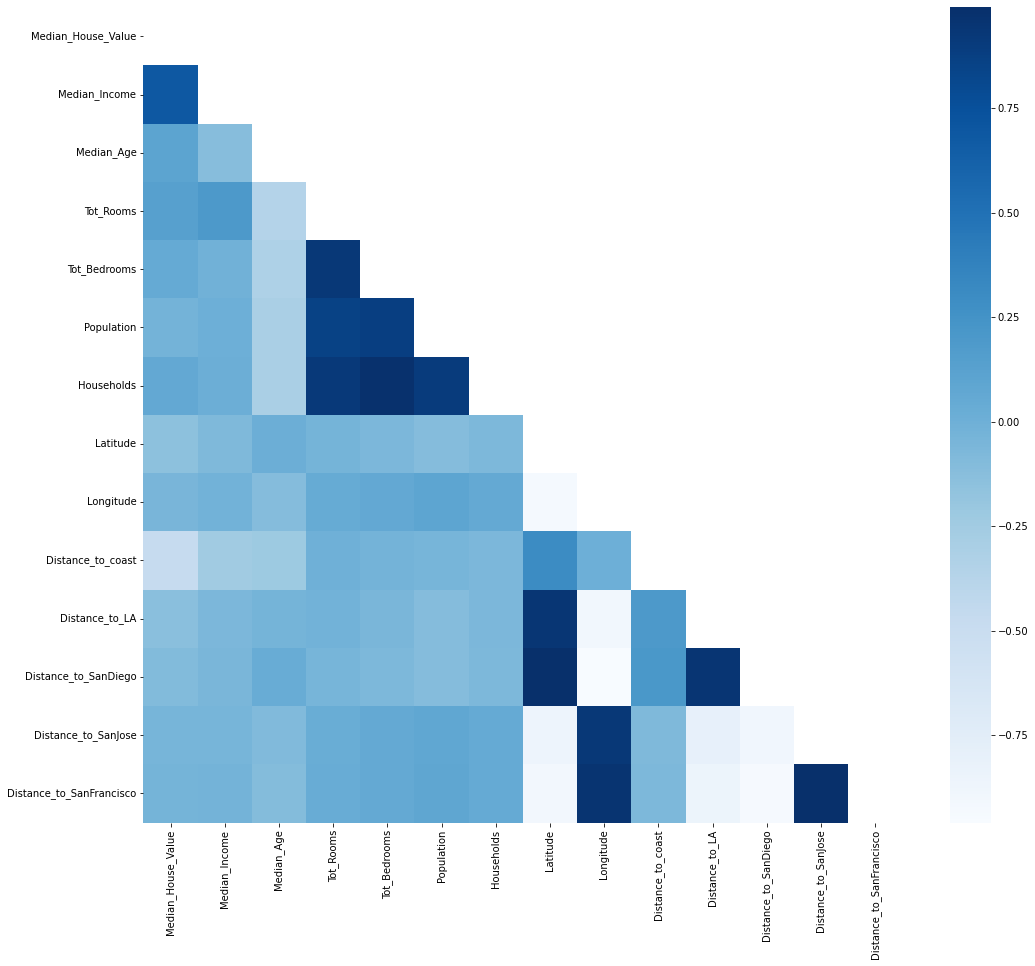

In [9]:
plt.figure(figsize=(17,15))

corr_data = np.triu(data.corr())
heat_map = sns.heatmap(data.corr(), mask = corr_data, cmap = 'Blues')
heat_map

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Median_House_Value', ylabel='Density'>

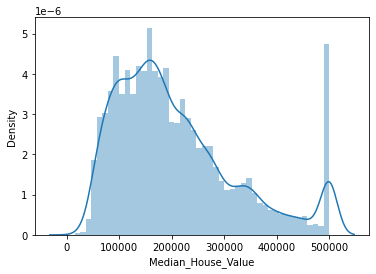

In [10]:
# House value distribution
sns.distplot(data.Median_House_Value)

array([[<AxesSubplot:title={'center':'Median_House_Value'}>,
        <AxesSubplot:title={'center':'Median_Income'}>,
        <AxesSubplot:title={'center':'Median_Age'}>,
        <AxesSubplot:title={'center':'Tot_Rooms'}>],
       [<AxesSubplot:title={'center':'Tot_Bedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>,
        <AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanJose'}>,
        <AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

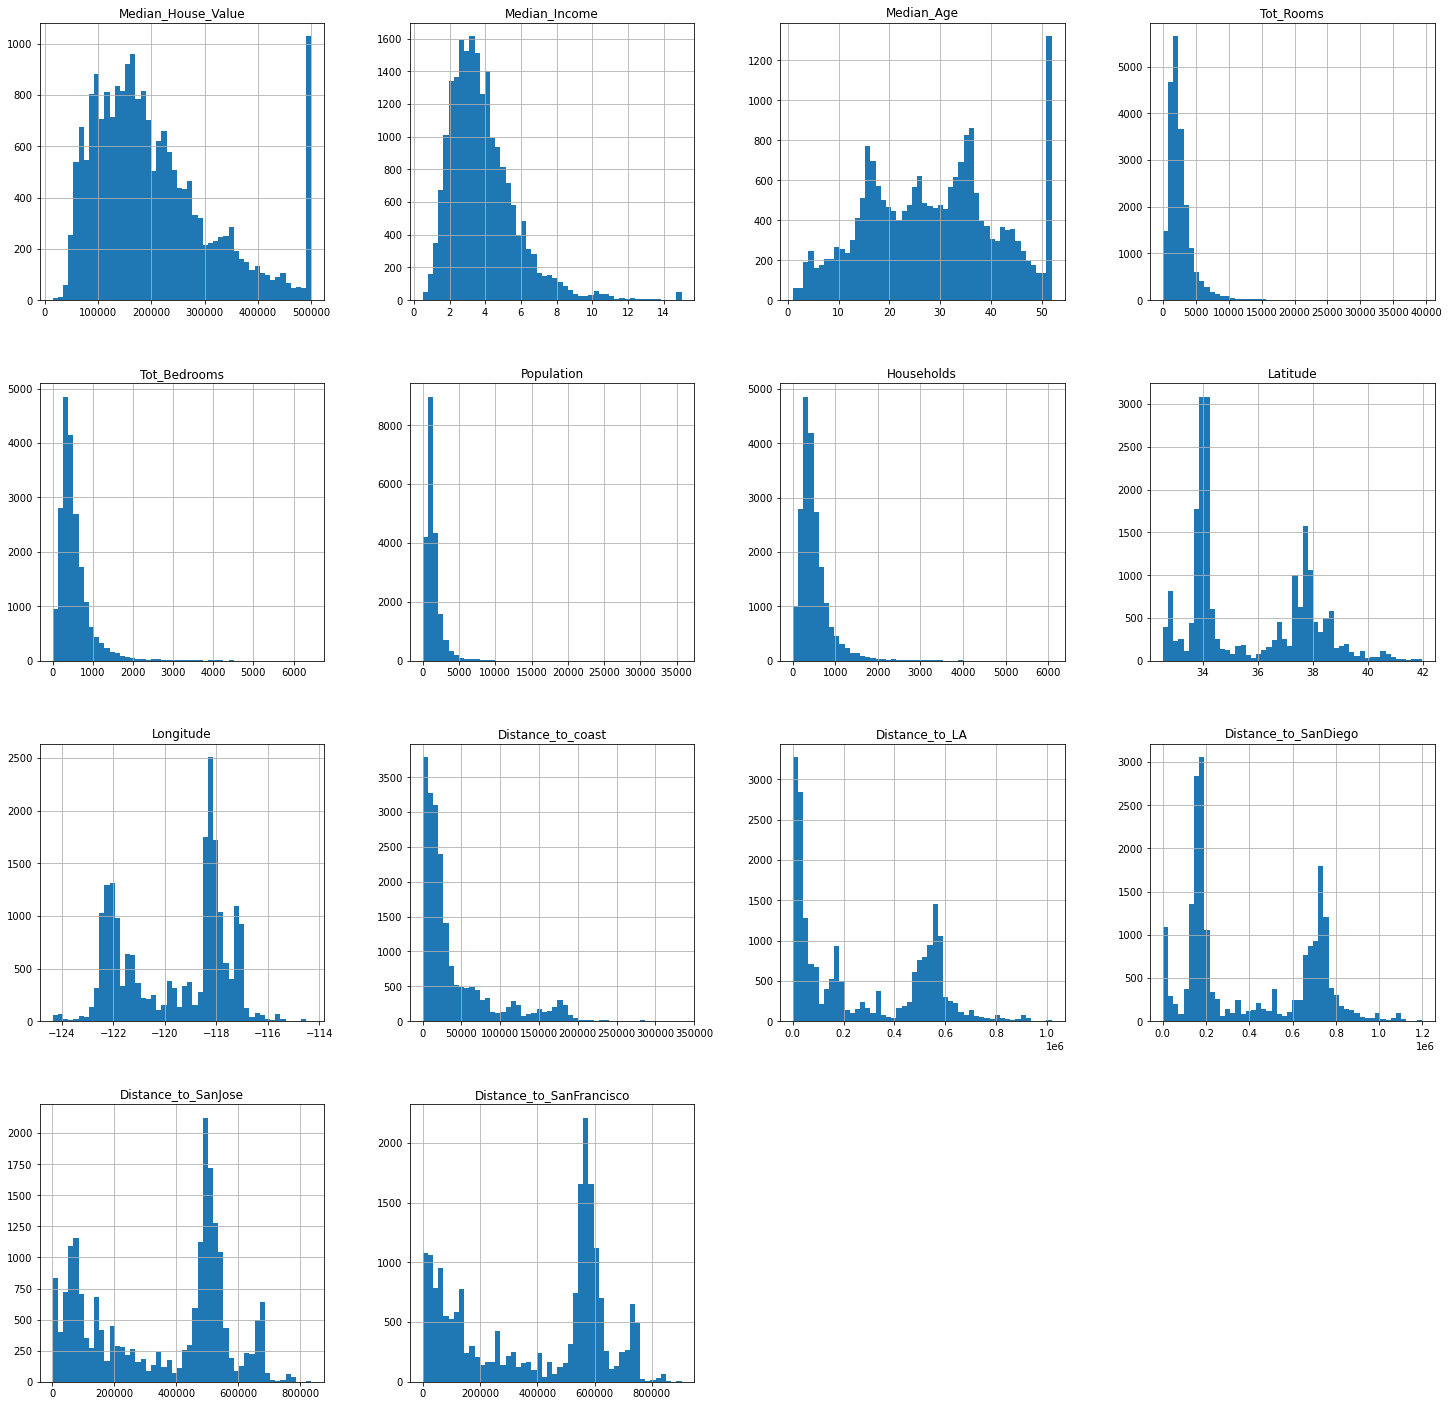

In [11]:
data.hist(figsize=(25,25), bins = 50)

#### Housing category
<p> Bin house median value into 4 categories to visualize of its surrounding homes

In [12]:
# Binning Median_House_Value
data['House_category'] = pd.cut(data['Median_House_Value'], bins = 4, labels=['Low','Mid','High','Lavish'])
data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,House_category
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,Lavish
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,High
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,High
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,High
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417,Low
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634,Low
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232,Low
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166,Low


In [13]:
# DataFrame for each catefory of houses
dflow = data.loc[data['House_category']=='Low']
dfmid = data.loc[data['House_category']=='Mid']
dfhigh = data.loc[data['House_category']=='High']
dflavish = data.loc[data['House_category']=='Lavish']

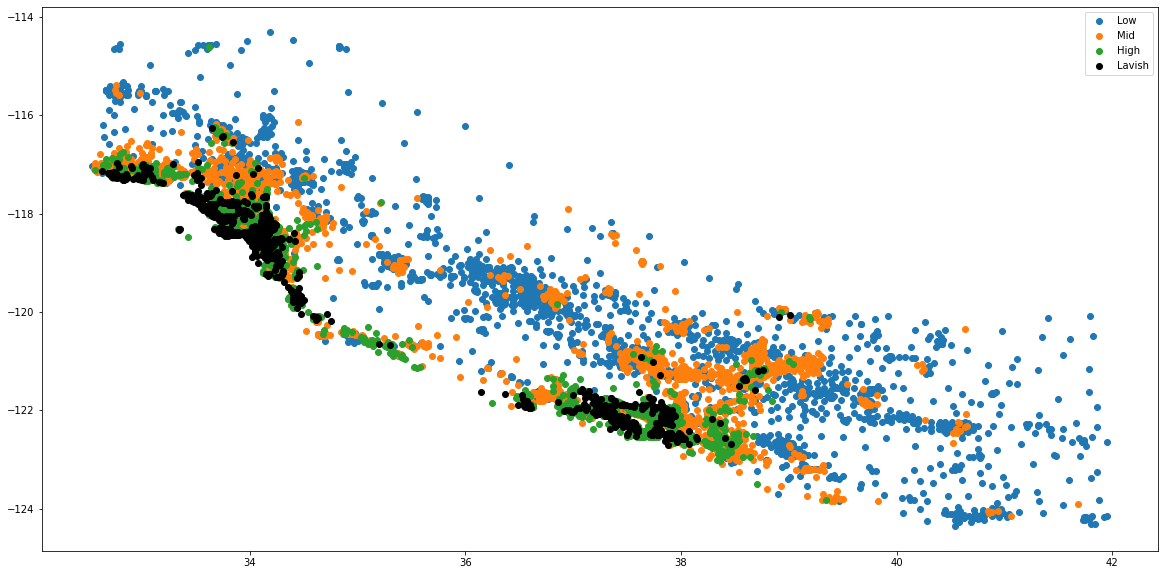

In [14]:
plt.figure(figsize=(20,10))
plt.plot(dflow['Latitude'], dflow['Longitude'], 'o', label='Low')
plt.plot(dfmid['Latitude'], dfmid['Longitude'], 'o', label='Mid')
plt.plot(dfhigh['Latitude'], dfhigh['Longitude'], 'o', label='High')
plt.plot(dflavish['Latitude'], dflavish['Longitude'], 'ko', label='Lavish')
plt.legend()

It can be seen that the lavish price houses are surrounded by high price houses. High price houses are then surrounded by mid-price houses.

#### Median income

<AxesSubplot:xlabel='Median_Income', ylabel='Median_House_Value'>

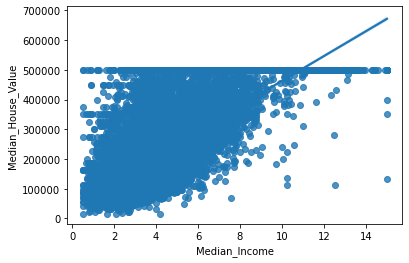

In [15]:
# Median income and House price
sns.regplot(x='Median_Income',y='Median_House_Value',data=data)

In [16]:
# Pearson correlation and p-value of Median income and Median House value
pear_coef, p_value = stats.pearsonr(data['Median_Income'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.6880752079585479 The P_value is:  0.0


##### Conclusion:
<p> The correlation coeffient between Median Income and Median price is statiscally significant, the linear relationship is quite strong 
<p> We should keep this variable

#### Total bedroom

<AxesSubplot:xlabel='Tot_Bedrooms', ylabel='Median_House_Value'>

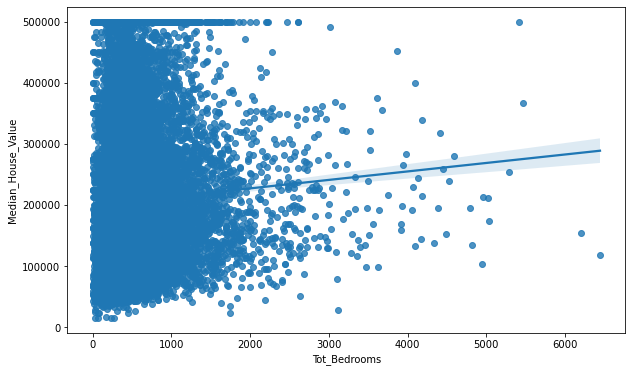

In [17]:
# Total bedrooms and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Tot_Bedrooms',y='Median_House_Value',data=data)

In [18]:
data[['Tot_Bedrooms','Median_House_Value']].corr()

,Tot_Bedrooms,Median_House_Value
Tot_Bedrooms,1.000000,0.050594
Median_House_Value,0.050594,1.000000


In [19]:
# Pearson correlation and p-value of Tot_Bedrooms and Median House value
pear_coef, p_value = stats.pearsonr(data['Tot_Bedrooms'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef)
print('The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.050593788812066415
The P_value is:  3.5201019265477303e-13


#### Conclusion:
<p> The Total of bedrooms is statistically significant but the linear relationship is extrmely weak.
<p> The Total of bedrooms itself is not very useful, we probably want to compare it to the number of rooms

In [20]:
# Creating Bedrooms_per_room variable
data['Bedrooms_per_room'] = data['Tot_Bedrooms'] / data['Tot_Rooms']
data['Bedrooms_per_room'].head(5)

0    0.146591
1    0.155797
2    0.129516
3    0.184458
4    0.172096
Name: Bedrooms_per_room, dtype: float64

In [21]:
# Check for correlation with Median House Value
pear_coef, p_value = stats.pearsonr(data['Bedrooms_per_room'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef)
print('The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.2556241671955807
The P_value is:  3.118689311524638e-305


<AxesSubplot:xlabel='Bedrooms_per_room', ylabel='Rooms_per_house'>

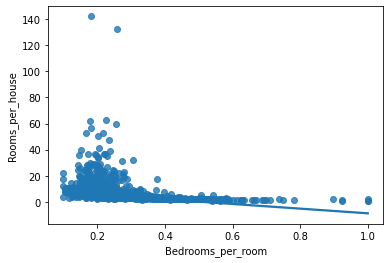

In [46]:
sns.regplot(x='Bedrooms_per_room', y= 'Rooms_per_house', data = data)

In [ ]:
sns.regplot(x='Bedrooms_per_room', y= 'Median_House_Value', data = data)

#### Conclusion:
<p> The Bedrooms_per_room attribute is more correlated with the median house value than the total number of rooms or bedrooms
<p> Apparently, houses with a lower bedroom/room ratio tend to be more expensive

#### Total room

(0.0, 524251.1)

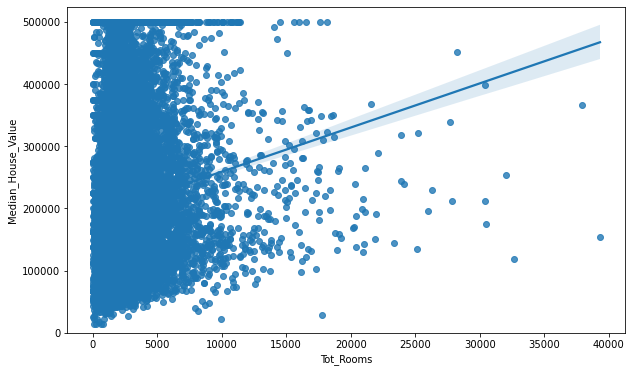

In [23]:
# Total rooms and Median House value
plt.figure(figsize=(10,6))
sns.regplot(x='Tot_Rooms',y='Median_House_Value',data=data)
plt.ylim(0,)

In [24]:
data[['Tot_Rooms','Median_House_Value']].corr()

,Tot_Rooms,Median_House_Value
Tot_Rooms,1.000000,0.134153
Median_House_Value,0.134153,1.000000


In [25]:
# Pearson correlation and p-value of Tot_Rooms and Median House value
pear_coef, p_value = stats.pearsonr(data['Tot_Rooms'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.13415311380656314 The P_value is:  1.6893845634754333e-83


##### Conclusion:
<p> Total numbers of rooms in a block is not very useful if we don't know how many houses there are within that block.
<p> A number of rooms per house will be a more interesting attribute

In [26]:
# Create Rooms_per_house
data['Rooms_per_house'] = data['Tot_Rooms']/data['Households']

In [27]:
# Pearson correlation and p-value of Rooms_per_house and Median House value
pear_coef, p_value = stats.pearsonr(data['Rooms_per_house'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.1519482897414578 The P_value is:  7.569242134631997e-107


##### Conclusion:
<p> The number of rooms per house is more informative than tha total number of rooms in a block. The larger the houses, the more expensive they are

#### Total room and Total Bedroom (Multicolinearity)

<AxesSubplot:xlabel='Tot_Rooms', ylabel='Tot_Bedrooms'>

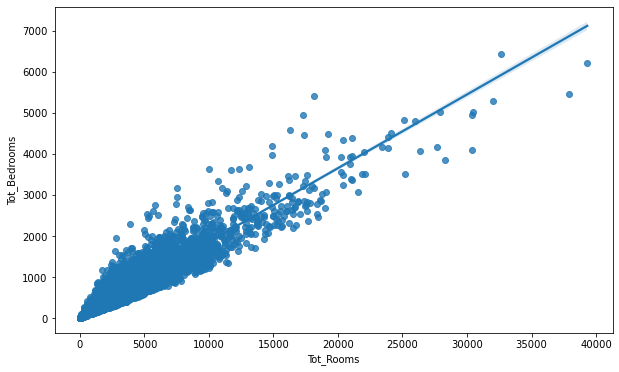

In [28]:
# Total rooms and Median House value
plt.figure(figsize=(10,6))
sns.regplot(x='Tot_Rooms',y='Tot_Bedrooms',data=data)

In [29]:
# Pearson correlation and p-value of Tot_Rooms and Tot_Bedrooms
pear_coef, p_value = stats.pearsonr(data['Tot_Rooms'], data['Tot_Bedrooms']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.9298933480131926 The P_value is:  0.0


##### Conclusion:
<p> These 2 variables have a strong correlation with each other which lead to multicollinearity problem
    

#### Population

<AxesSubplot:xlabel='Population', ylabel='Median_House_Value'>

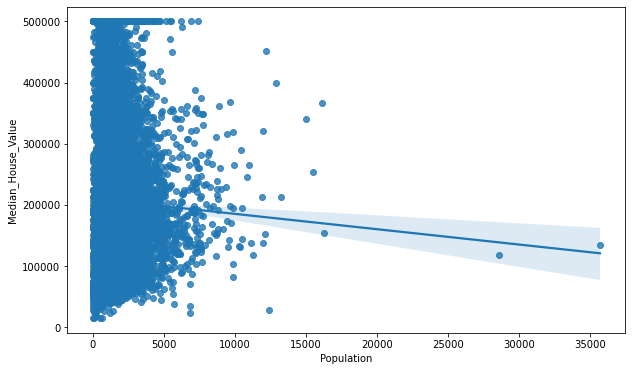

In [30]:
# Population and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Population',y='Median_House_Value',data=data)

In [31]:
# Pearson correlation and p-value of Tot_Rooms and 
pear_coef, p_value = stats.pearsonr(data['Population'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.02464967888889491 The P_value is:  0.0003976307847911049


##### Conclusion:
<p> The correlation coeffient between Population and Median house value is statiscally significant but the linear relationship is extremely weak. 
<p> The population is not really a useful attribute. However, we can calculate for the population per household which might be more interesting

In [32]:
# Creating Population_per_household
data['Population_per_household'] =  data['Population']/data['Households']

In [33]:
# Pearson correlation and p-value of Population_per_household and Median House Value
pear_coef, p_value = stats.pearsonr(data['Population_per_household'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef)
print('The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.02373741295613435
The P_value is:  0.0006483442370042923


#### Households

<AxesSubplot:xlabel='Households', ylabel='Median_House_Value'>

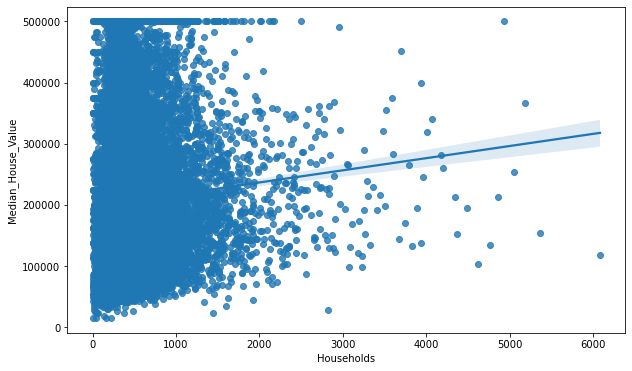

In [34]:
# Households and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Households',y='Median_House_Value',data=data)

In [35]:
# Pearson correlation and p-value of Households and Median House Value
pear_coef, p_value = stats.pearsonr(data['Households'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.06584265057005648 The P_value is:  2.8234206519537093e-21


##### Conclusion:
<p> The correlation coeffient between Households and Median house value is statiscally significant but the linear relationship is extremely weak. 

##### Distance_to_coast

<AxesSubplot:xlabel='Distance_to_coast', ylabel='Median_House_Value'>

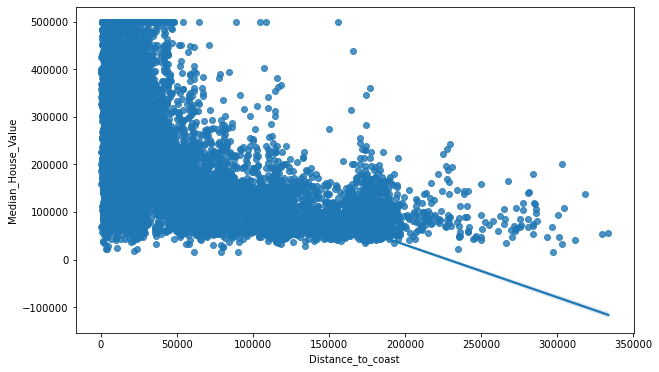

In [36]:
# Distance_to_coast and Median price
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_coast',y='Median_House_Value',data=data)

In [37]:
# Pearson correlation and p-value of Distance_to_coast and Population
pear_coef, p_value = stats.pearsonr(data['Distance_to_coast'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.469350451855051 The P_value is:  0.0


##### Conclusion:
<p> Distance_to_coast is statistically significan, but the negative linear relationship is just moderate

#### Distance_to_SanDiego

<AxesSubplot:xlabel='Distance_to_SanDiego', ylabel='Median_House_Value'>

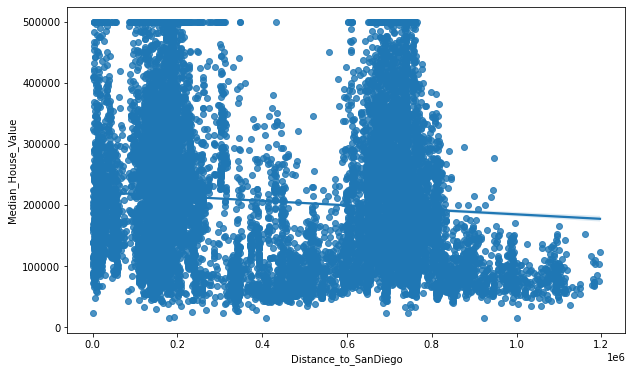

In [38]:
# Distance_to_SanDiego and Median price
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_SanDiego',y='Median_House_Value',data=data)

In [39]:
# Pearson correlation and p-value of Distance_to_SanDiego and House Value
pear_coef, p_value = stats.pearsonr(data['Distance_to_SanDiego'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.09251014492383523 The P_value is:  1.8106486302390247e-40


#### Conclusion:
<p> Distance_to_SanDiego is stattiscally significant but the linear relationship is extremely weak.

#### Distance_to_LA

<AxesSubplot:xlabel='Distance_to_LA', ylabel='Median_House_Value'>

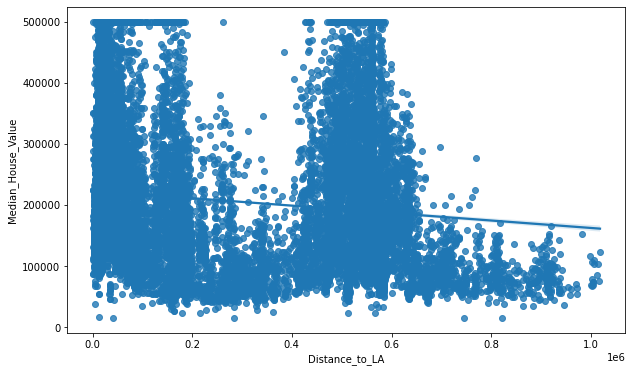

In [40]:
# Distance_to_LA and Median price
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_LA',y='Median_House_Value',data=data)

In [41]:
# Pearson correlation and p-value of Distance_to_LA and House Value
pear_coef, p_value = stats.pearsonr(data['Distance_to_LA'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.13067830439891445 The P_value is:  2.7334653819533997e-79


#### Conclusion: 
<p> Distance_to_LA is statistically significant but the negative linear relationship is extremely weak.

#### Distance_to_SanJose

<AxesSubplot:xlabel='Distance_to_SanJose', ylabel='Median_House_Value'>

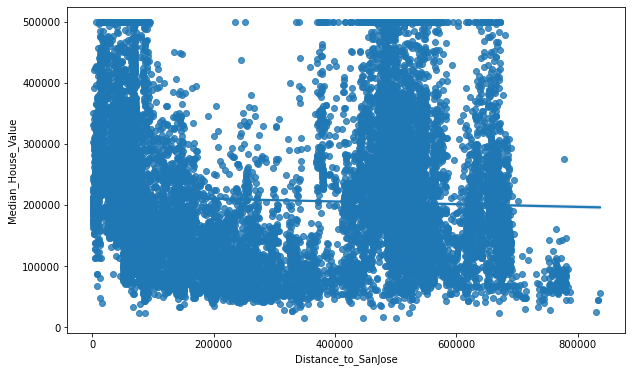

In [42]:
# Distance_to_SanJose and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_SanJose',y='Median_House_Value',data=data)

In [43]:
# Pearson correlation and p-value of Distance_to_SanJose and House Value
pear_coef, p_value = stats.pearsonr(data['Distance_to_SanJose'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.04158978421236835 The P_value is:  2.2690271222952545e-09


##### Conclusion: 
<p> Distance_to_SanJose is statistically significant but the linear relationship is extremely small. 

#### Distance_to_SanFrancisco

<AxesSubplot:xlabel='Distance_to_SanFrancisco', ylabel='Median_House_Value'>

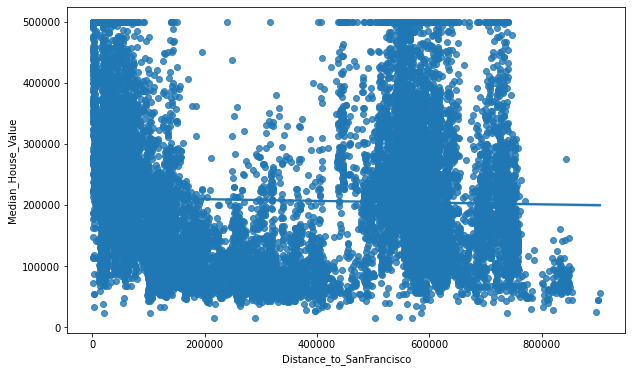

In [44]:
# Distance_to_SanFrancisco and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_SanFrancisco',y='Median_House_Value',data=data)

In [45]:
# Pearson correlation and p-value of Distance_to_SanFrancisco and Median House Value
pear_coef, p_value = stats.pearsonr(data['Distance_to_SanFrancisco'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.030558988110684304 The P_value is:  1.1280164681918788e-05


##### Conclusion: 
<p> Distance_to_SanFrancisco is statistically significant but the linear relationship is extremely small.

# Split training and testing data

In [48]:
y = data['Median_House_Value']
X = data.drop('Median_House_Value', axis =1)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)

print('Number of test sample: ', X_test.shape[0])
print('Number of train sample: ', X_train.shape[0])

Number of test sample:  6192
Number of train sample:  14448
